In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('artifacts/cleaned_car_details.csv')

In [3]:
df.head()

Make    Price  Year  Kilometer Fuel Type Transmission   Location  \
0          Honda   505000  2017      87150    Petrol       Manual       Pune   
1  Maruti Suzuki   450000  2014      75000    Diesel       Manual   Ludhiana   
2        Hyundai   220000  2011      67000    Petrol       Manual    Lucknow   
3         Toyota   799000  2019      37500    Petrol       Manual  Mangalore   
4         Toyota  1950000  2018      69000    Diesel       Manual     Mumbai   

    Owner Seller Type  Engine Drivetrain  Length   Width  Height  \
0   First   Corporate  1198.0        FWD  3990.0  1680.0  1505.0   
1  Second  Individual  1248.0        FWD  3995.0  1695.0  1555.0   
2   First  Individual  1197.0        FWD  3585.0  1595.0  1550.0   
3   First  Individual  1197.0        FWD  3995.0  1745.0  1510.0   
4   First  Individual  2393.0        RWD  4735.0  1830.0  1795.0   

   Seating Capacity  Fuel Tank Capacity  Max Power bhp  Max Torque Nm  \
0               5.0                35.0           87.0       109.0000   
1               5.0                42.0           74.0       190.0000   
2               5.0                35.0           79.0       112.7619   
3               5.0                37.0           82.0       113.0000   
4               7.0                55.0          148.0       343.0000   

      Height_yj  Price_yj  
0 -6.661338e-16 -0.629046  
1 -1.110223e-16 -0.773385  
2 -1.665335e-16 -1.722330  
3 -6.383782e-16 -0.076938  
4  1.582068e-15  0.901726

In [4]:
df.dtypes

Make                   object
Price                   int64
Year                    int64
Kilometer               int64
Fuel Type              object
Transmission           object
Location               object
Owner                  object
Seller Type            object
Engine                float64
Drivetrain             object
Length                float64
Width                 float64
Height                float64
Seating Capacity      float64
Fuel Tank Capacity    float64
Max Power bhp         float64
Max Torque Nm         float64
Height_yj             float64
Price_yj              float64
dtype: object

# EDA

In [5]:
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
numerical_cols

Index(['Price', 'Year', 'Kilometer', 'Engine', 'Length', 'Width', 'Height',
       'Seating Capacity', 'Fuel Tank Capacity', 'Max Power bhp',
       'Max Torque Nm', 'Height_yj', 'Price_yj'],
      dtype='object')

In [6]:
numerical_cols.size

13

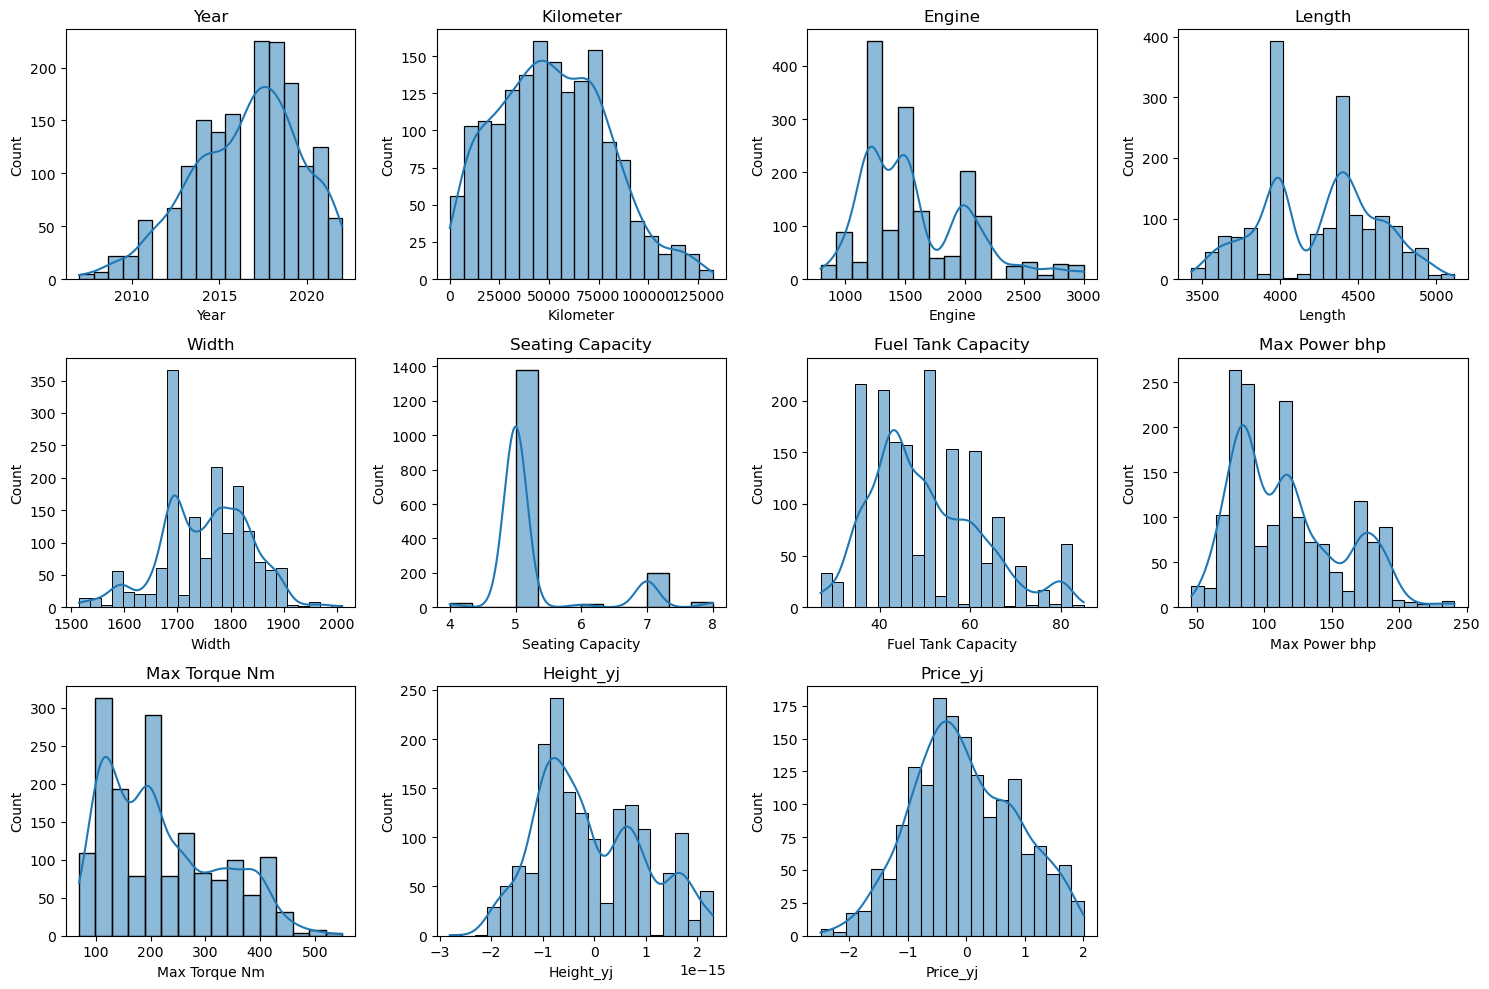

In [7]:
# Exclude 'Price' and 'Height'
numerical_cols = numerical_cols.drop(['Price', 'Height'])

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)

plt.tight_layout()
plt.show()

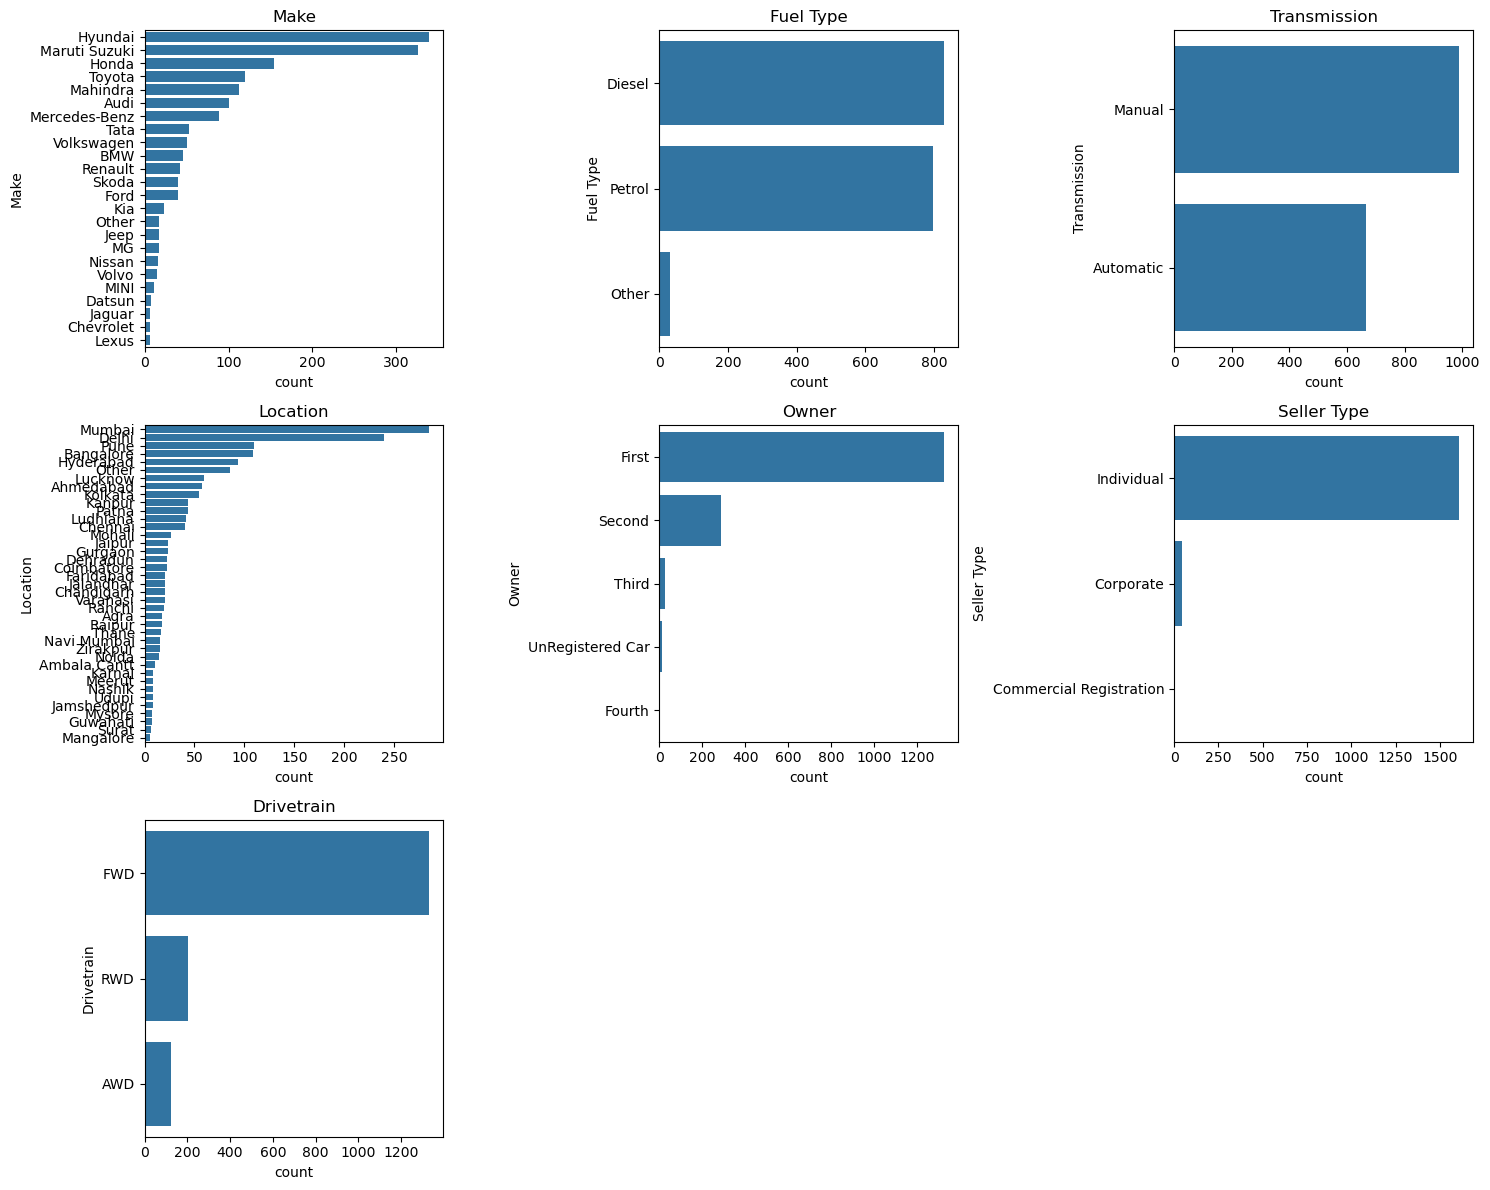

In [8]:
plt.figure(figsize=(15, 12))

categorical_cols = df.select_dtypes(include=['object']).columns

for i, col in enumerate(categorical_cols):
    plt.subplot(3, 3, i + 1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(col)
    plt.tight_layout()

plt.show()

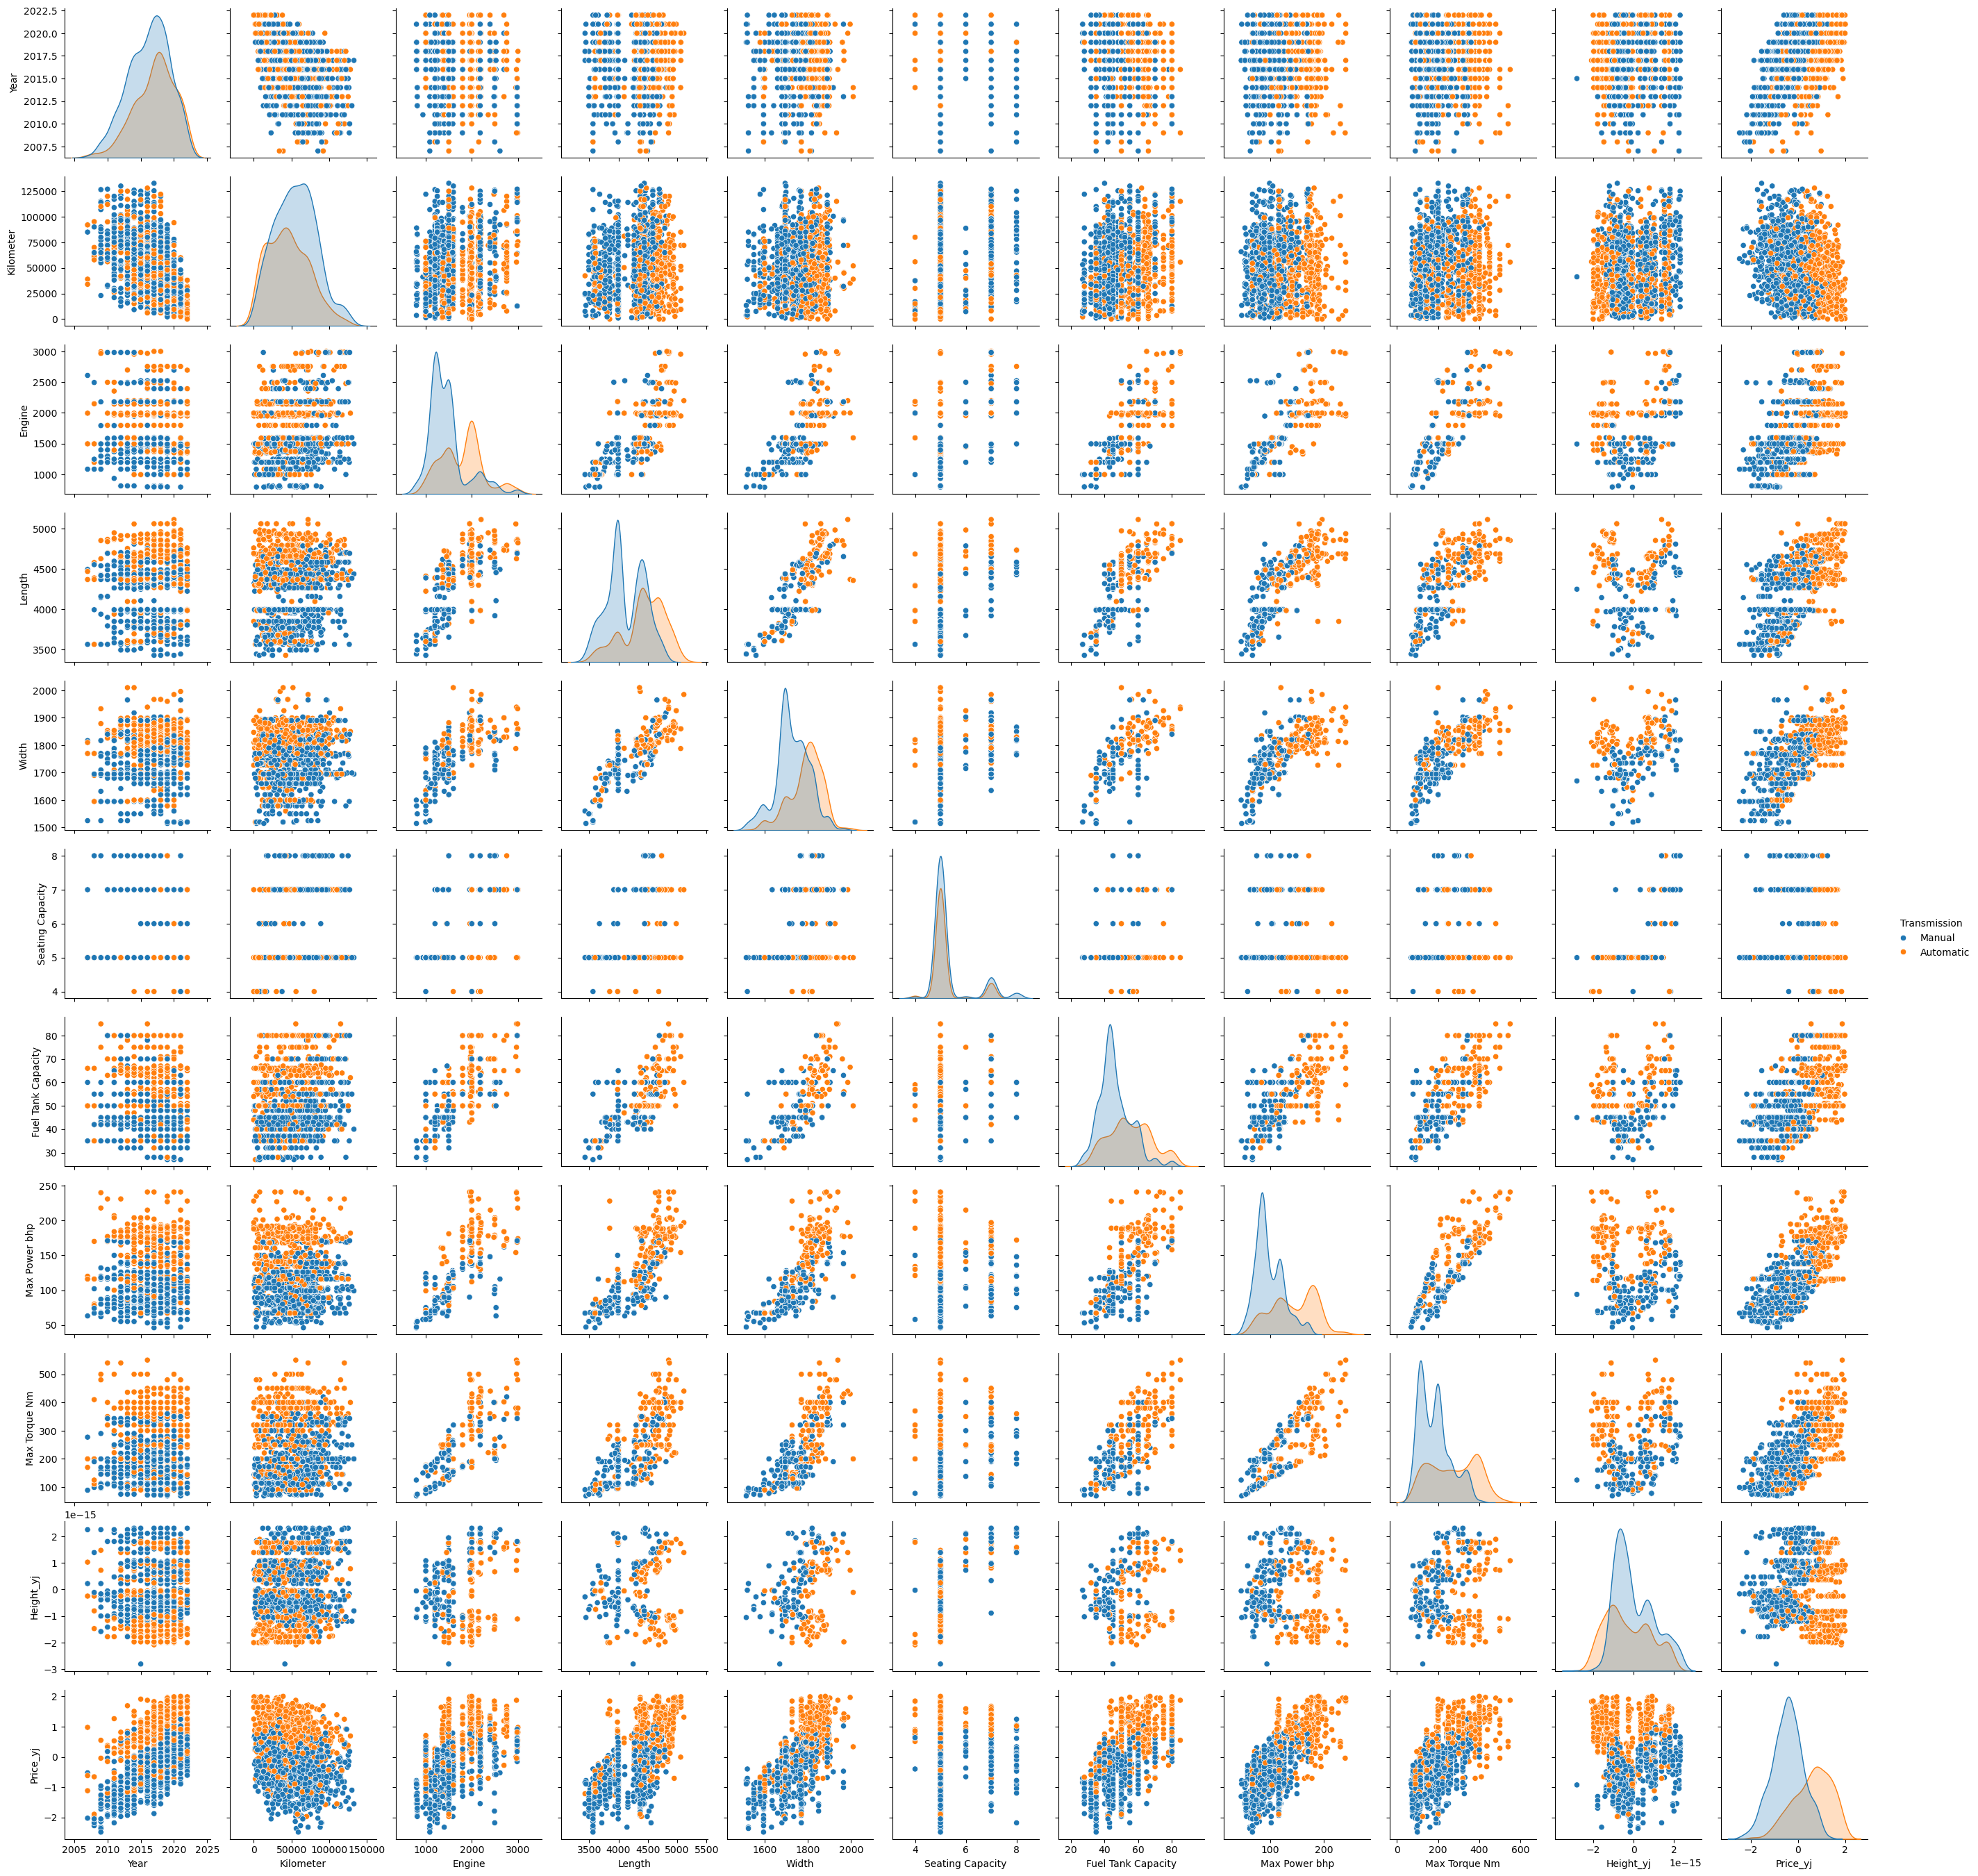

In [9]:
sns.pairplot(df.drop(columns=["Price", "Height"]), hue="Transmission", diag_kind='kde')
plt.show()

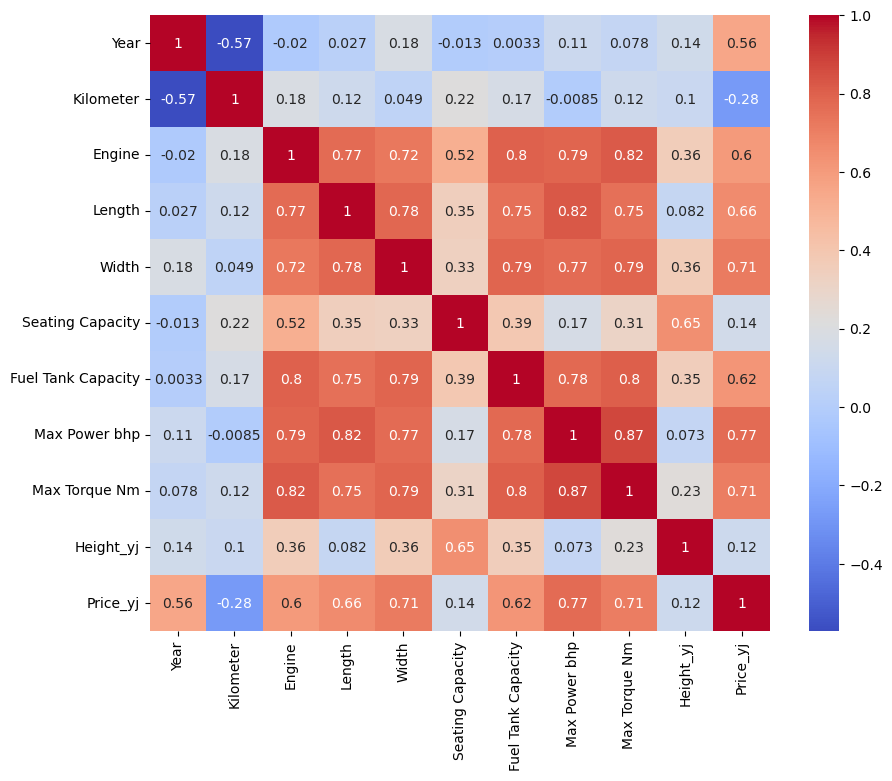

In [10]:
plt.figure(figsize=(10, 8))

sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.show()

Highly Correlated Features | highest correlation with Price_yj:
- Year, Kilometer | Year
- Engine, Length, Width | Width 
- Fuel Tank Capacity, Max Power bhp, Max Torque Nm | Max Power bhp

In [11]:
categorical_cols

Index(['Make', 'Fuel Type', 'Transmission', 'Location', 'Owner', 'Seller Type',
       'Drivetrain'],
      dtype='object')

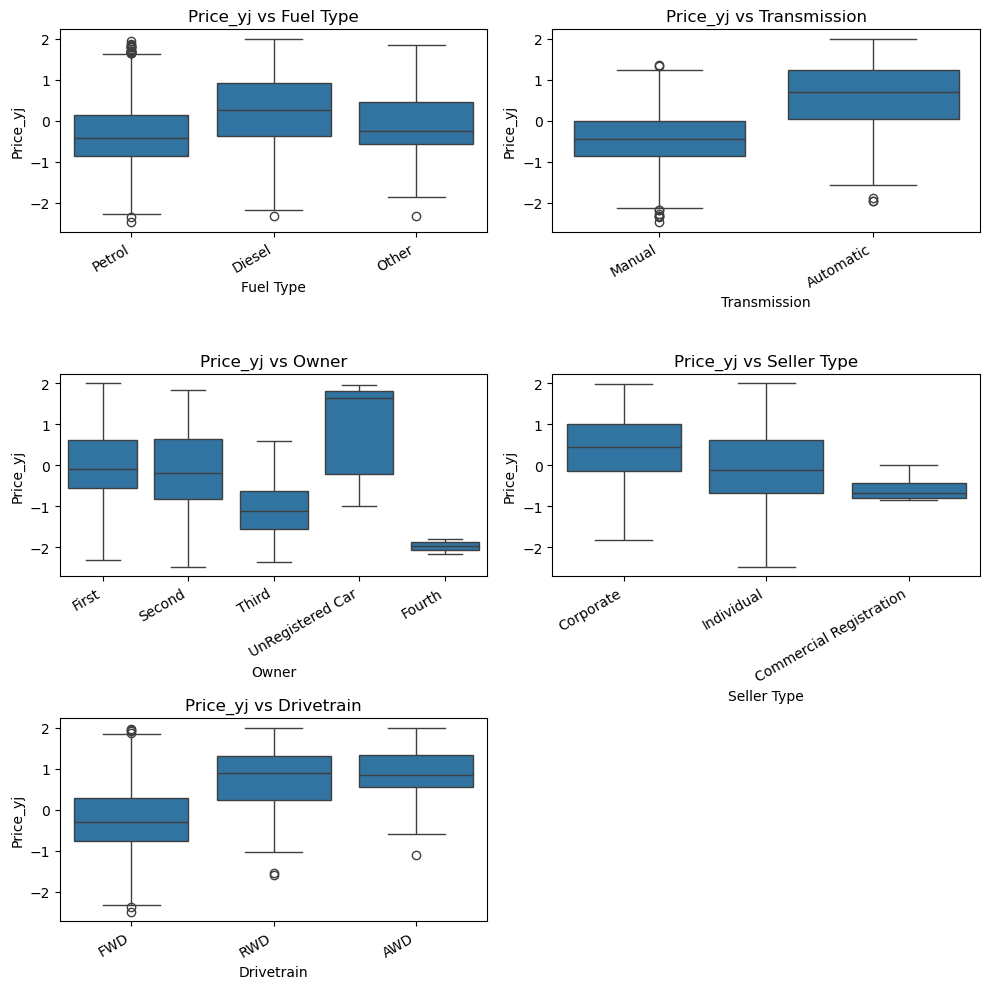

In [12]:
plt.figure(figsize=(10, 10))

for i, col in enumerate(['Fuel Type', 'Transmission', 'Owner', 'Seller Type', 'Drivetrain']):
    plt.subplot(3, 2, i+1)
    sns.boxplot(x=df[col], y=df['Price_yj'])
    plt.title(f'Price_yj vs {col}')
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()

plt.show()

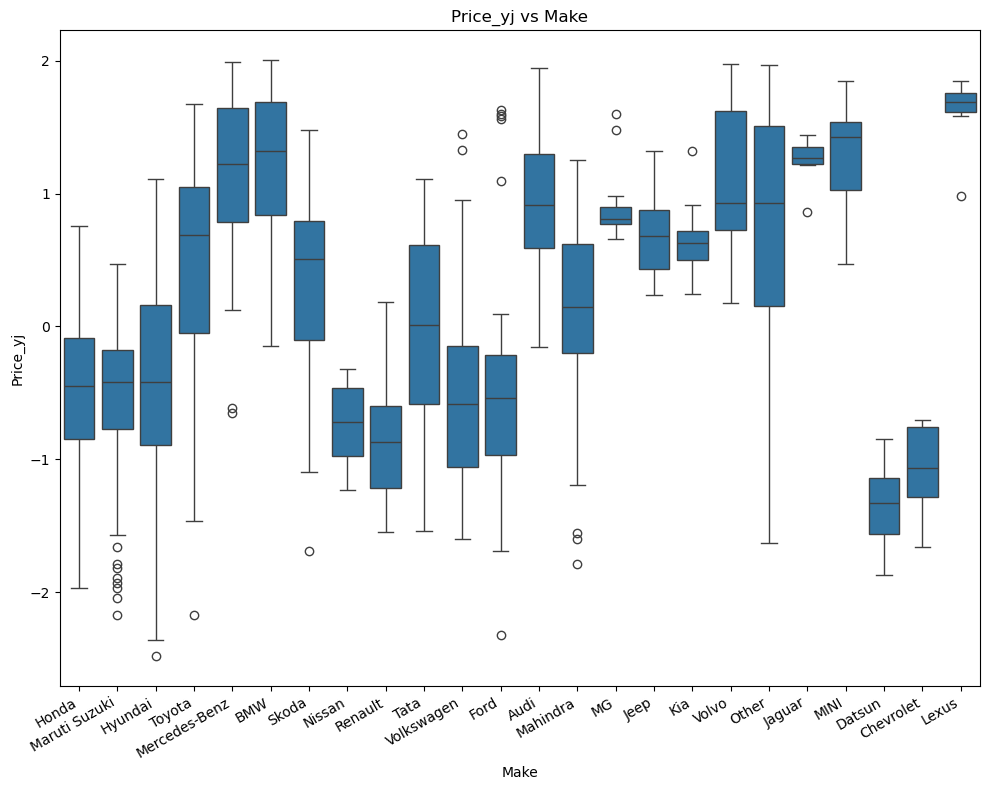

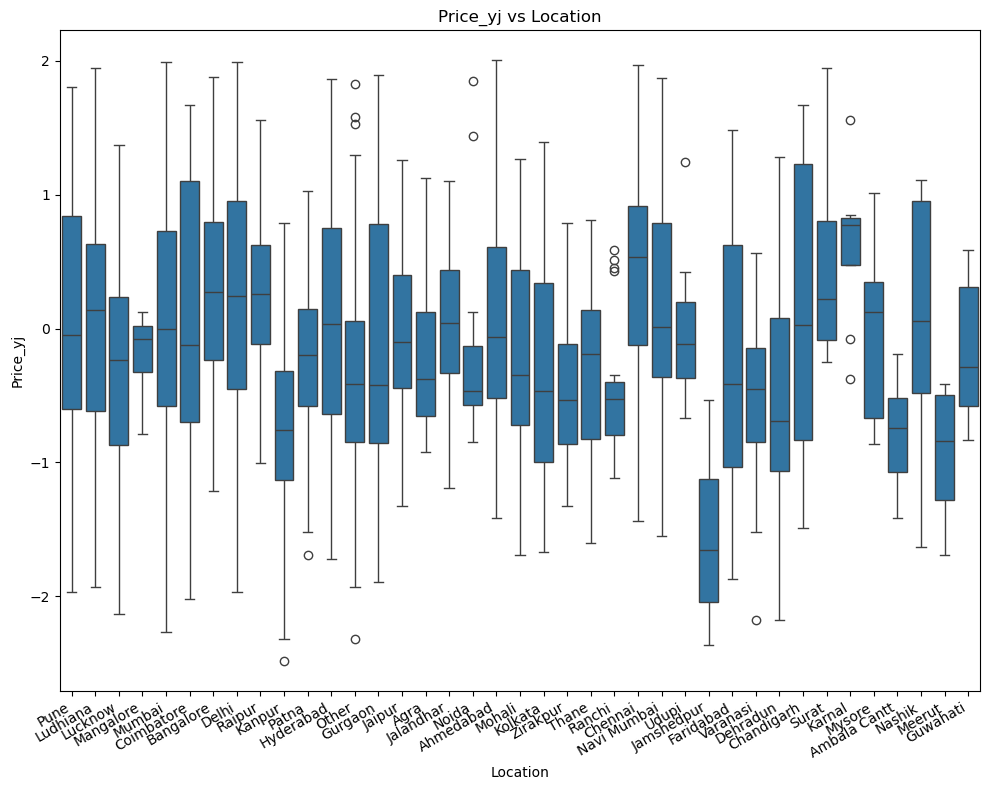

In [13]:
for i, col in enumerate(['Make', 'Location']):
    plt.figure(figsize=(10, 8))
    sns.boxplot(x=df[col], y=df['Price_yj'])
    plt.title(f'Price_yj vs {col}')
    plt.xticks(rotation=30, ha="right")
    plt.tight_layout()
    plt.show()

# Feature Engineering

In [14]:
X = df.drop(columns=["Price_yj", "Price"])
y = df["Price_yj"]

In [15]:
X["Car_Age"] = 2023 - X["Year"]
X["Car_Age"].head()

0     6
1     9
2    12
3     4
4     5
Name: Car_Age, dtype: int64

In [16]:
X["Mileage_per_Year"] = X["Kilometer"] / (X["Car_Age"].replace(0, 1))
X["Mileage_per_Year"]

0       14525.000000
1        8333.333333
2        5583.333333
3        9375.000000
4       13800.000000
            ...     
1650    12900.000000
1651     9222.222222
1652     7300.000000
1653    12094.800000
1654    12000.000000
Name: Mileage_per_Year, Length: 1655, dtype: float64

<Axes: xlabel='Mileage_per_Year', ylabel='Count'>

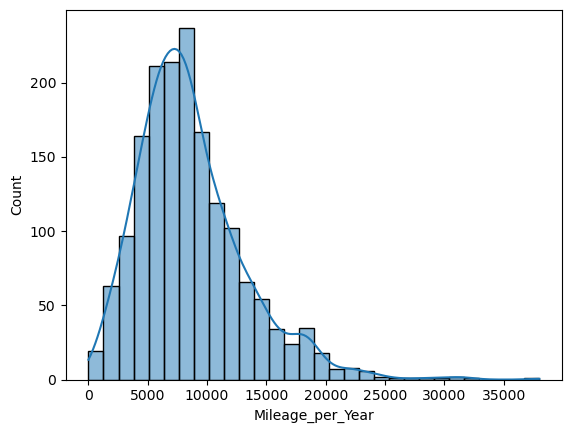

In [17]:
sns.histplot(X["Mileage_per_Year"], kde=True, bins=30)

In [18]:
X["Is_First_Owner"] = (X["Owner"] == "First").astype(int)

In [19]:
X["Transmission"].value_counts()

Transmission
Manual       988
Automatic    667
Name: count, dtype: int64

In [20]:
X["Is_manual"] = X["Transmission"].apply(lambda x: 1 if x == "Manual" else 0)

In [21]:
X["Seller Type"].value_counts()

Seller Type
Individual                 1607
Corporate                    44
Commercial Registration       4
Name: count, dtype: int64

In [22]:
X["Volume"] = X["Length"] * X["Width"] * X["Height"]
X["Volume"].describe()

count    1.655000e+03
mean     1.184585e+10
std      2.015949e+09
min      7.698283e+09
25%      1.039953e+10
50%      1.162365e+10
75%      1.293718e+10
max      1.792527e+10
Name: Volume, dtype: float64

<Axes: xlabel='Volume', ylabel='Count'>

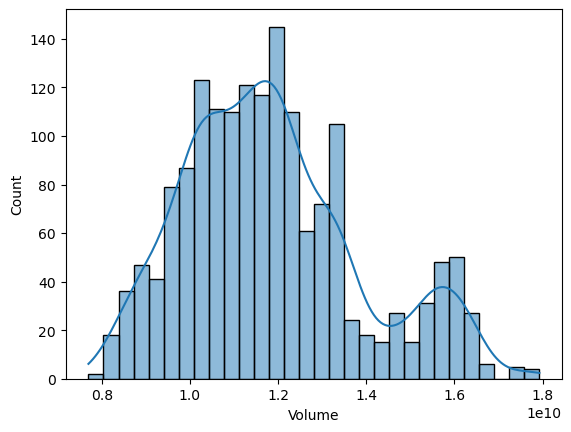

In [23]:
sns.histplot(X["Volume"], kde=True, bins=30)

In [24]:
X["Is_Individual_Seller"] = X["Seller Type"].apply(lambda x: 1 if x == "Individual" else 0)

In [25]:
X.columns

Index(['Make', 'Year', 'Kilometer', 'Fuel Type', 'Transmission', 'Location',
       'Owner', 'Seller Type', 'Engine', 'Drivetrain', 'Length', 'Width',
       'Height', 'Seating Capacity', 'Fuel Tank Capacity', 'Max Power bhp',
       'Max Torque Nm', 'Height_yj', 'Car_Age', 'Mileage_per_Year',
       'Is_First_Owner', 'Is_manual', 'Volume', 'Is_Individual_Seller'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

standard_features = ["Length", "Width", "Height_yj", "Fuel Tank Capacity", 
                     "Max Power bhp", "Max Torque Nm", 'Kilometer', "Mileage_per_Year", 
                     "Engine", "Volume"]
minmax_features = ["Seating Capacity", "Car_Age"]
binary_features = ["Is_First_Owner", "Is_manual", "Is_Individual_Seller"]
categorical_features = ["Make", "Fuel Type", "Location", "Seller Type", "Drivetrain"]

preprocessor = ColumnTransformer(
    transformers=[
        ("std", StandardScaler(), standard_features),
        ("minmax", MinMaxScaler(), minmax_features),
        ("bin", "passthrough", binary_features),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_features)
    ],
    remainder="drop"
)

# Spliting train and test data

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [27]:
X_train_transformed = preprocessor.fit_transform(X_train)
X_test_transformed = preprocessor.transform(X_test)

In [28]:
X_train_transformed.shape, X_test_transformed.shape

((1324, 87), (331, 87))

In [29]:
X_transformed_columns = preprocessor.get_feature_names_out()
X_transformed_columns

array(['std__Length', 'std__Width', 'std__Height_yj',
       'std__Fuel Tank Capacity', 'std__Max Power bhp',
       'std__Max Torque Nm', 'std__Kilometer', 'std__Mileage_per_Year',
       'std__Engine', 'std__Volume', 'minmax__Seating Capacity',
       'minmax__Car_Age', 'bin__Is_First_Owner', 'bin__Is_manual',
       'bin__Is_Individual_Seller', 'cat__Make_Audi', 'cat__Make_BMW',
       'cat__Make_Chevrolet', 'cat__Make_Datsun', 'cat__Make_Ford',
       'cat__Make_Honda', 'cat__Make_Hyundai', 'cat__Make_Jaguar',
       'cat__Make_Jeep', 'cat__Make_Kia', 'cat__Make_Lexus',
       'cat__Make_MG', 'cat__Make_MINI', 'cat__Make_Mahindra',
       'cat__Make_Maruti Suzuki', 'cat__Make_Mercedes-Benz',
       'cat__Make_Nissan', 'cat__Make_Other', 'cat__Make_Renault',
       'cat__Make_Skoda', 'cat__Make_Tata', 'cat__Make_Toyota',
       'cat__Make_Volkswagen', 'cat__Make_Volvo', 'cat__Fuel Type_Diesel',
       'cat__Fuel Type_Other', 'cat__Fuel Type_Petrol',
       'cat__Location_Agra', 'cat

In [30]:
X_train_transformed = pd.DataFrame(
    X_train_transformed.toarray()
    if hasattr(X_train_transformed, "toarray") 
    else X_train_transformed,
    
    columns=X_transformed_columns
)

X_train_transformed.head()

std__Length  std__Width  std__Height_yj  std__Fuel Tank Capacity  \
0     0.343694    0.211650       -0.144819                 0.027140   
1    -0.668648    0.151425        0.766951                 0.196835   
2    -1.724532   -0.872389       -0.627520                -1.245573   
3    -0.690419   -0.872389       -0.547070                -1.245573   
4     1.203640    0.693444       -1.405206                 1.384700   

   std__Max Power bhp  std__Max Torque Nm  std__Kilometer  \
0           -0.004186           -0.179774       -0.339866   
1           -0.434438           -0.130684       -0.455840   
2           -0.738144           -1.073206       -0.307458   
3           -0.738144           -1.073206       -0.805299   
4            1.919290            1.783813       -1.590494   

   std__Mileage_per_Year  std__Engine  std__Volume  ...  cat__Location_Thane  \
0              -1.134292    -0.184252     0.066915  ...                  0.0   
1              -0.952078    -0.184252    -0.098535  ...                  0.0   
2              -0.851911    -0.851919    -1.370494  ...                  0.0   
3              -1.187985    -0.851919    -0.871185  ...                  0.0   
4              -1.470836     0.821699     0.208042  ...                  0.0   

   cat__Location_Udupi  cat__Location_Varanasi  cat__Location_Zirakpur  \
0                  0.0                     0.0                     0.0   
1                  0.0                     0.0                     0.0   
2                  0.0                     0.0                     0.0   
3                  0.0                     0.0                     0.0   
4                  0.0                     0.0                     0.0   

   cat__Seller Type_Commercial Registration  cat__Seller Type_Corporate  \
0                                       0.0                         1.0   
1                                       0.0                         0.0   
2                                       0.0                         0.0   
3                                       0.0                         0.0   
4                                       0.0                         0.0   

   cat__Seller Type_Individual  cat__Drivetrain_AWD  cat__Drivetrain_FWD  \
0                          0.0                  0.0                  1.0   
1                          1.0                  0.0                  1.0   
2                          1.0                  0.0                  1.0   
3                          1.0                  0.0                  1.0   
4                          1.0                  0.0                  0.0   

   cat__Drivetrain_RWD  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  1.0  

[5 rows x 87 columns]

In [31]:
X_test_transformed = pd.DataFrame(
    X_test_transformed.toarray()
    if hasattr(X_test_transformed, "toarray") 
    else X_test_transformed,
    columns=X_transformed_columns
)
X_test_transformed.head()

std__Length  std__Width  std__Height_yj  std__Fuel Tank Capacity  \
0     0.071559    0.332098        0.632867                 0.875615   
1    -1.085015   -0.209921       -0.278902                -1.075878   
2    -0.676812   -0.209921       -0.466620                -1.075878   
3    -0.676812   -0.691716       -0.010735                -0.651641   
4    -0.676812    0.211650        0.445150                -0.397098   

   std__Max Power bhp  std__Max Torque Nm  std__Kilometer  \
0            0.147667           -0.631399       -0.052477   
1           -0.687527           -1.033934       -1.004582   
2           -0.864689           -1.033934        0.636628   
3           -1.067160           -0.277953        0.899629   
4            0.046432           -0.454676       -0.877733   

   std__Mileage_per_Year  std__Engine  std__Volume  ...  cat__Location_Thane  \
0              -0.061773     0.022725     0.287854  ...                  0.0   
1               0.754000    -0.854144    -0.811522  ...                  0.0   
2               1.146372    -0.854144    -0.663302  ...                  0.0   
3               0.902322    -0.740641    -0.648812  ...                  0.0   
4              -0.388231    -1.297030    -0.235973  ...                  0.0   

   cat__Location_Udupi  cat__Location_Varanasi  cat__Location_Zirakpur  \
0                  0.0                     0.0                     0.0   
1                  0.0                     0.0                     0.0   
2                  0.0                     0.0                     0.0   
3                  0.0                     0.0                     0.0   
4                  0.0                     0.0                     0.0   

   cat__Seller Type_Commercial Registration  cat__Seller Type_Corporate  \
0                                       0.0                         0.0   
1                                       0.0                         0.0   
2                                       0.0                         0.0   
3                                       0.0                         0.0   
4                                       0.0                         0.0   

   cat__Seller Type_Individual  cat__Drivetrain_AWD  cat__Drivetrain_FWD  \
0                          1.0                  0.0                  1.0   
1                          1.0                  0.0                  1.0   
2                          1.0                  0.0                  1.0   
3                          1.0                  0.0                  1.0   
4                          1.0                  0.0                  1.0   

   cat__Drivetrain_RWD  
0                  0.0  
1                  0.0  
2                  0.0  
3                  0.0  
4                  0.0  

[5 rows x 87 columns]

# Feature Selection

In [32]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import SelectKBest, mutual_info_regression
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Create a custom scorer for mutual information that ignores negative values
def mutual_info_regression_wrapper(X, y):
    return mutual_info_regression(X, y, random_state=42)

results = []

for N in range(2, 11):
    print(f"Evaluating for top {N} features...")
    feature_selector = SelectKBest(score_func=mutual_info_regression_wrapper, k=N)
    model = RandomForestRegressor(random_state=42)
    
    pipeline = Pipeline([
        ('feature_selector', feature_selector),
        ('model', model)
    ])
    
    cv_scores = cross_val_score(pipeline, X_train_transformed, y_train, 
                               scoring='neg_mean_squared_error', cv=5)
    
    cv_mse = -cv_scores.mean()
    
    # Fit to get selected features
    pipeline.fit(X_train_transformed, y_train)
    selected_mask = pipeline.named_steps['feature_selector'].get_support()
    selected_features = X_train_transformed.columns[selected_mask].values
    
    print(f"Cross-Validated MSE: {cv_mse:.4f}\n")
    
    results.append({
        'N_features': N, 
        'CV_MSE': cv_mse, 
        'Features': selected_features
    })

# Analyze the results to find the N with the lowest CV MSE
best_N_result = min(results, key=lambda x: x['CV_MSE'])

print(f"Optimal number of features (N) is: {best_N_result['N_features']}")
print(f"Best Cross-Validated MSE achieved: {best_N_result['CV_MSE']:.4f}")
print(f"Features used: {best_N_result['Features']}")

Evaluating for top 2 features...
Cross-Validated MSE: 0.1782

Evaluating for top 3 features...
Cross-Validated MSE: 0.1667

Evaluating for top 4 features...
Cross-Validated MSE: 0.1630

Evaluating for top 5 features...
Cross-Validated MSE: 0.1613

Evaluating for top 6 features...
Cross-Validated MSE: 0.1587

Evaluating for top 7 features...
Cross-Validated MSE: 0.1589

Evaluating for top 8 features...
Cross-Validated MSE: 0.1562

Evaluating for top 9 features...
Cross-Validated MSE: 0.0861

Evaluating for top 10 features...
Cross-Validated MSE: 0.0695



In [35]:
import joblib

# Load the price scaler
target_scaler = joblib.load('artifacts/price_yj_scaler.pkl')

In [36]:
def get_original_price(y_transformed):
    return target_scaler.inverse_transform(y_transformed.values.reshape(-1, 1)).flatten()

In [37]:
y_test_original = get_original_price(y_test)

In [38]:
# Now fit the final model with the optimal number of features on the entire training set
from sklearn.feature_selection import mutual_info_regression
from sklearn.metrics import mean_squared_error

optimal_N = best_N_result['N_features']

final_pipeline = Pipeline([
    ('feature_selector', SelectKBest(score_func=mutual_info_regression, k=optimal_N)),
    ('model', RandomForestRegressor(random_state=42))
])

final_pipeline.fit(X_train_transformed, y_train)

# Get the selected features from the final model
final_feature_selector = final_pipeline.named_steps['feature_selector']
selected_mask = final_feature_selector.get_support()
selected_features = X_train_transformed.columns[selected_mask]

In [41]:
# Transform both training and test sets
X_train_optimal = final_feature_selector.transform(X_train_transformed)
X_test_optimal = final_feature_selector.transform(X_test_transformed)

# Final evaluation on test set
y_pred_final = final_pipeline.predict(X_test_transformed)
y_pred_inversed = get_original_price(pd.Series(y_pred_final))
final_test_mse = mean_squared_error(y_test_original, y_pred_inversed)

print(f"Final Test MSE with optimal features: {final_test_mse:.4f}")
print(f"Selected features in final model: {selected_features.tolist()}")

Final Test MSE with optimal features: 116048375345.3949
Selected features in final model: ['std__Length', 'std__Width', 'std__Height_yj', 'std__Fuel Tank Capacity', 'std__Max Power bhp', 'std__Max Torque Nm', 'std__Engine', 'std__Volume', 'minmax__Car_Age', 'bin__Is_manual']


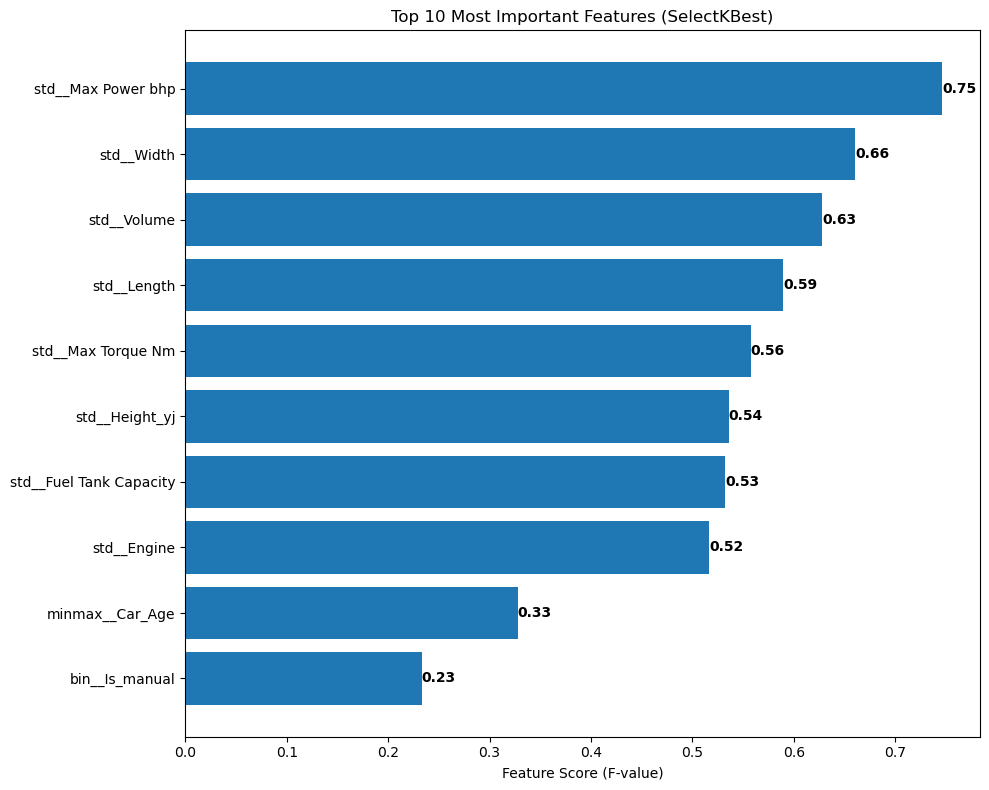


Top 10 Feature Scores:
                Feature    Score P-value
     std__Max Power bhp 0.746254    None
             std__Width 0.660249    None
            std__Volume 0.627989    None
            std__Length 0.589781    None
     std__Max Torque Nm 0.557481    None
         std__Height_yj 0.535594    None
std__Fuel Tank Capacity 0.532109    None
            std__Engine 0.516228    None
        minmax__Car_Age 0.327691    None
         bin__Is_manual 0.232939    None


In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the feature scores from the final fitted SelectKBest
final_feature_selector = final_pipeline.named_steps['feature_selector']
feature_scores = pd.DataFrame({
    'Feature': X_train_transformed.columns,
    'Score': final_feature_selector.scores_,
    'P-value': final_feature_selector.pvalues_
}).sort_values('Score', ascending=False)

# Get the top N features (using the optimal number we found)
top_features_df = feature_scores.head(optimal_N)

# Create the horizontal bar plot
plt.figure(figsize=(10, 8))
bars = plt.barh(top_features_df['Feature'], top_features_df['Score'])
plt.xlabel('Feature Score (Mutual Information)')
plt.title(f'Top {optimal_N} Most Important Features (SelectKBest)')
plt.gca().invert_yaxis()  # Highest score at the top

# Add value labels on the bars
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height()/2, 
             f'{width:.2f}', 
             ha='left', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

# Print the feature scores table
print(f"\nTop {optimal_N} Feature Scores:")
print(top_features_df[['Feature', 'Score', 'P-value']].to_string(index=False))

In [43]:
print(X_train_optimal.shape, X_test_optimal.shape)

(1324, 10) (331, 10)


In [44]:
joblib.dump((X_train_optimal, X_test_optimal, y_train, y_test), 
            "artifacts/car_data_selected.joblib")

['artifacts/car_data_selected.joblib']